In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn 




In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

2023-04-04 13:12:38.898368: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 13:12:41.026996: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 13:12:41.027867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 13:12:42.176371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


170498071/170498071 [==============================] - 14s 0us/step


In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

visualise data 



array([9], dtype=uint8)

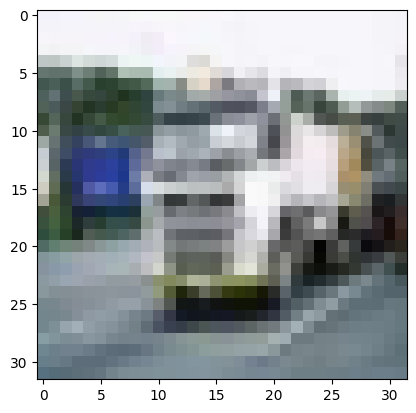

In [4]:

i = 1000


plt.imshow(X_train[i])
y_train[i]


In [5]:
# W_grid = 15
# L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
# axes = axes.ravel()

# n_training = len(X_train)

# for i in np.arange(0, L_grid * W_grid):
#     index = np.random.randint(0,100) # pick a random number
#     axes[i].imshow(X_train[index])
#     axes[i].set_title(y_train[index])
#     axes[i].axis('off')
    
# plt.subplots_adjust(hspace = 0.4)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
number_cat = 10
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)
X_train = X_train/255
X_test = X_test/255

training model 


In [7]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [9]:

# from ann_visualizer.visualize import ann_viz;
# #Build your model here
# ann_viz(cnn_model, title="My first neural network")

In [10]:
from tensorflow.keras import optimizers

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [11]:
# fit data 
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

2023-04-04 13:13:07.427274: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2
1563/1563 [==============================] - 185s 117ms/step - loss: 1.6143 - accuracy: 0.4187
Epoch 2/2
1563/1563 [==============================] - 185s 119ms/step - loss: 1.1969 - accuracy: 0.5867


In [17]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
y_test = y_test.argmax(1)




2023-04-04 13:40:58.729283: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


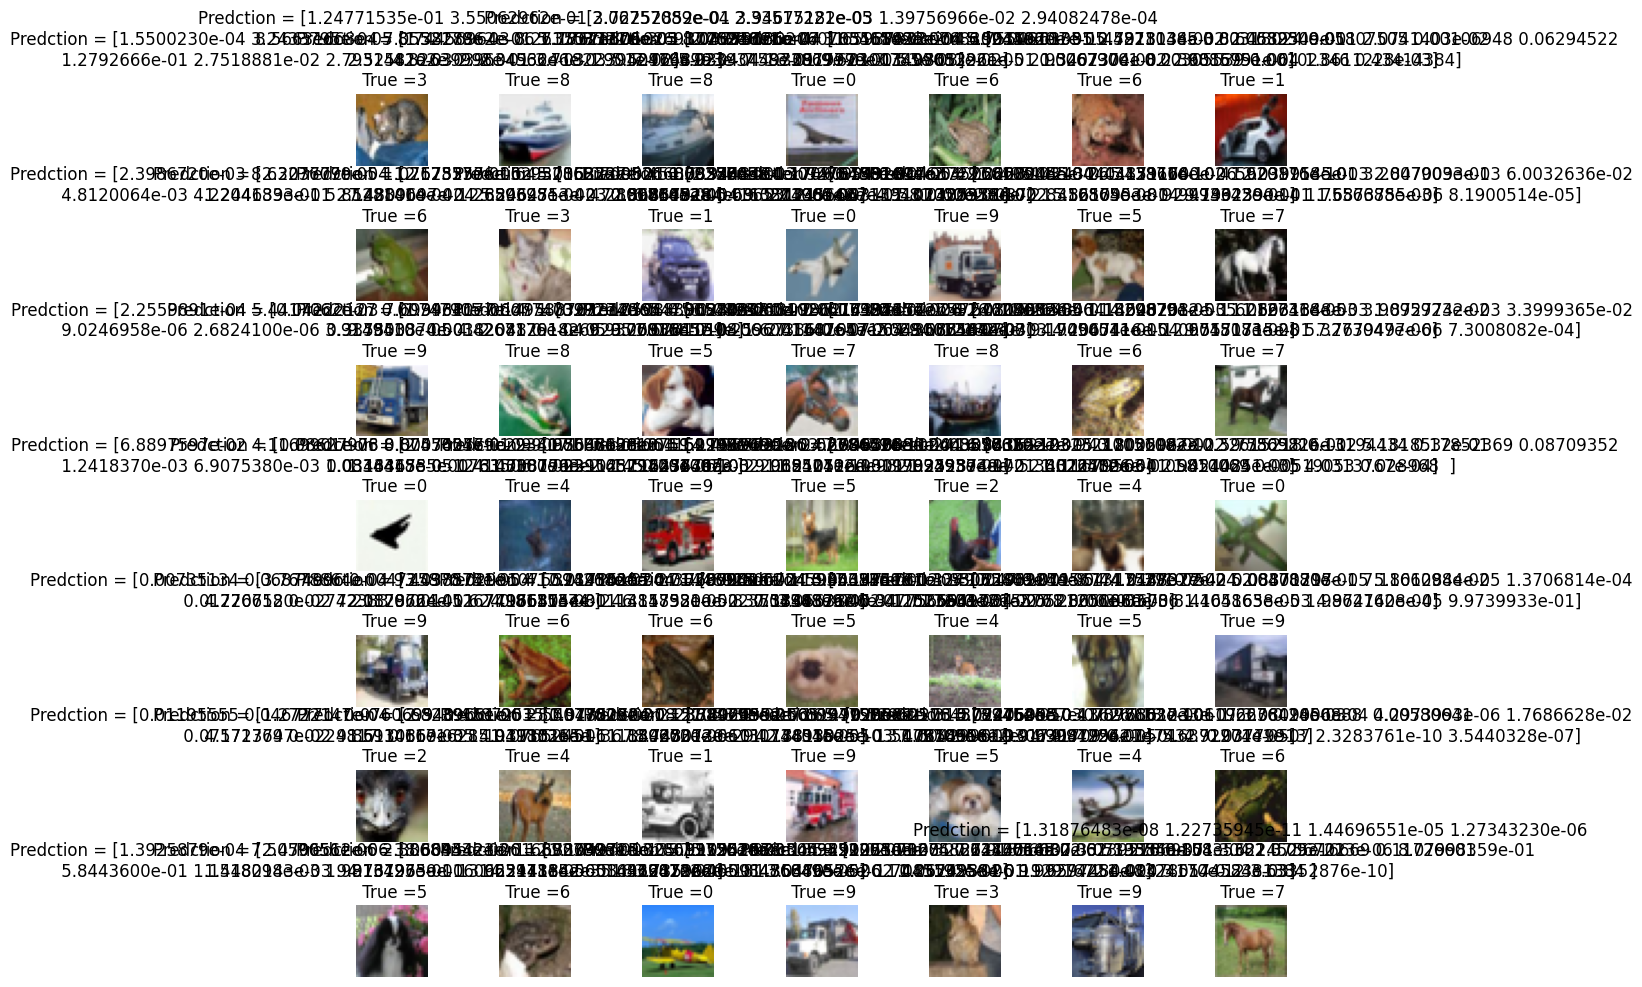

In [18]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Predction = {predicted_classes[i]} \n True ={ y_test[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets